# Data

In [1]:
import pandas as pd
import numpy as np

train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
sample_submission = pd.read_csv("data/sample_submission.csv")

In [2]:
X, y = train.drop(["label"], axis=1) ,train.label
X.head(1)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
y.head(1)

0    1
Name: label, dtype: int64

- Each row has 1 label value indicating the number and 784(28*28) pixel columns for indicating rgb numbers(0-255) of each pixel. 

In [254]:
y[y==9]

11       9
27       9
28       9
31       9
33       9
        ..
41962    9
41969    9
41975    9
41992    9
41999    9
Name: label, Length: 4188, dtype: int64

## RGB to image

In [4]:
import matplotlib.pyplot as plt
def print_img(pixel_df, index):
    digit_image = pixel_df.iloc[index].values.reshape((28,28))
    plt.imshow(digit_image, cmap=plt.get_cmap('gray'))
    plt.axis('off')
    plt.show();

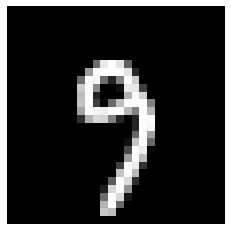

In [258]:
print_img(X, 41962)

## SGDClassifier

In [198]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

In [199]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
clf = make_pipeline(StandardScaler(),
                    SGDClassifier(random_state = 0))

clf.fit(X_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(random_state=0))])

In [200]:
y_pred = clf.predict(X_val)
clf_acc = accuracy_score(y_val, y_pred)
clf_acc

0.9102380952380953

In [201]:
import pickle
pickle.dump(clf, open("models/sgd_classifier", 'wb'))

In [203]:
X_val.reset_index(drop=True, inplace = True)
def clf_predict(pixel_df, index):
    pixel_df.reset_index(drop=True, inplace = True)
    
    print("Image making prediction on"), print_img(pixel_df, index), print("Prediction is: " + str(clf.predict(pixel_df.loc[[index]])));

Image making prediction on


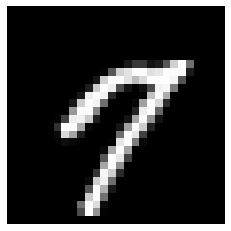

Prediction is: [7]


In [207]:
clf_predict(X_val, 2221)

## Basic ANN

In [222]:
# scaling
X_train = X_train / 255
X_val = X_val / 255

In [8]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1050/1050 [==============================] - 3s 2ms/step - loss: 0.5711 - accuracy: 0.8557
Epoch 2/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.3283 - accuracy: 0.9065
Epoch 3/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2958 - accuracy: 0.9158
Epoch 4/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2796 - accuracy: 0.9214
Epoch 5/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2682 - accuracy: 0.9241
Epoch 6/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2619 - accuracy: 0.9258
Epoch 7/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2561 - accuracy: 0.9274
Epoch 8/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2516 - accuracy: 0.9286
Epoch 9/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2473 - accuracy: 0.9303
Epoch 10/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.244

In [9]:
model.evaluate(X_val, y_val);

263/263 [==============================] - 1s 2ms/step - loss: 0.2759 - accuracy: 0.9258


In [10]:
def ann_predict(pixel_df, index):
    pixel_df.reset_index(drop=True, inplace = True)
    print("Image making prediction on"), print_img(pixel_df, index) 
    prediction = np.argmax(model.predict(pixel_df.iloc[[index]]))
    print(f"Prediction is {prediction} with {model.predict(pixel_df.iloc[[index]])[0][prediction]} probability")

Image making prediction on


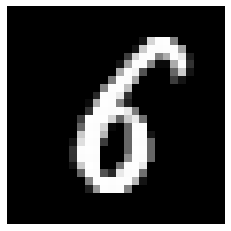

Prediction is 6 with 0.9820855259895325 probability


In [11]:
ann_predict(X_val, 240)

## ANN with Dense Layer

In [12]:
model2 = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model2.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model2.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.3400 - accuracy: 0.9029
Epoch 2/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1545 - accuracy: 0.9557
Epoch 3/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1101 - accuracy: 0.9672
Epoch 4/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0826 - accuracy: 0.9754
Epoch 5/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0639 - accuracy: 0.9810
Epoch 6/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0541 - accuracy: 0.9836
Epoch 7/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0417 - accuracy: 0.9874
Epoch 8/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0327 - accuracy: 0.9905
Epoch 9/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0263 - accuracy: 0.9929
Epoch 10/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.022

In [13]:
model2.evaluate(X_val, y_val);

263/263 [==============================] - 1s 2ms/step - loss: 0.1135 - accuracy: 0.9696


In [14]:
def ann_predict2(pixel_df, index):
    pixel_df.reset_index(drop=True, inplace = True)
    print("Image making prediction on"), print_img(pixel_df, index) 
    prediction = np.argmax(model2.predict(pixel_df.iloc[[index]]))
    print(f"Prediction is {prediction} with {model2.predict(pixel_df.iloc[[index]])[0][prediction]} probability")

In [187]:
model2.predict(X_val.iloc[[0]].values)

array([[2.17495579e-03, 9.13569456e-05, 1.01414006e-02, 9.99944210e-01,
        2.54257460e-09, 9.81258392e-01, 9.09214898e-04, 1.07607426e-04,
        8.88664126e-01, 1.30293459e-01]], dtype=float32)

In [186]:
X_val.iloc[[0]]

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Image making prediction on


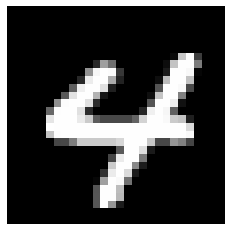

Prediction is 4 with 1.0 probability


In [29]:
ann_predict2(X_val, 1000)

In [181]:
model2.save('models/digit_predicter_ann')

INFO:tensorflow:Assets written to: models/digit_predicter_ann\assets


### Basic CNN

In [223]:
X_train_reshaped = [i.reshape((28,28)) for i in X_train.values]
X_train_reshaped = np.array(X_train_reshaped)
X_train_reshaped = X_train_reshaped.reshape(-1, 28, 28, 1)
X_train_reshaped.shape

(33600, 28, 28, 1)

In [251]:
from keras import layers, models

cnn = models.Sequential([
    # cnn
    layers.Conv2D(filters=12, kernel_size=(3, 3),input_shape=(28,28,1), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=24, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    # dense
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

cnn.compile(optimizer='adam', 
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

cnn.fit(X_train_reshaped, y_train, epochs = 20)

Epoch 1/20
1050/1050 [==============================] - 4s 3ms/step - loss: 0.5468 - accuracy: 0.8377
Epoch 2/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0803 - accuracy: 0.9747
Epoch 3/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0526 - accuracy: 0.9830
Epoch 4/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0398 - accuracy: 0.9877
Epoch 5/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0295 - accuracy: 0.9909
Epoch 6/20
1050/1050 [==============================] - 4s 3ms/step - loss: 0.0214 - accuracy: 0.9931
Epoch 7/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0190 - accuracy: 0.9938
Epoch 8/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0145 - accuracy: 0.9955
Epoch 9/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0102 - accuracy: 0.9970
Epoch 10/20
1050/1050 [==============================] - 4s 3ms/step - loss: 0.012

In [252]:
X_val_reshaped = [i.reshape((28,28)) for i in X_val.values]
X_val_reshaped = np.array(X_val_reshaped)
X_val_reshaped = X_val_reshaped.reshape(-1, 28, 28, 1)
cnn.evaluate(X_val_reshaped, y_val);

263/263 [==============================] - 1s 2ms/step - loss: 0.0649 - accuracy: 0.9875


In [240]:
cnn.save('models/digit_predicter_cnn')

INFO:tensorflow:Assets written to: models/digit_predicter_cnn\assets


In [228]:
test_reshaped = [i.reshape((28,28)) for i in test.values]
test_reshaped = np.array(test_reshaped)
test_reshaped = test_reshaped.reshape(-1, 28, 28, 1) / 255
predictions = cnn.predict(test_reshaped)

In [230]:
predictions = [i.argmax() for i in predictions]

In [232]:
sample_submission

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
27995,27996,0
27996,27997,0
27997,27998,0
27998,27999,0


In [234]:
sample_submission.Label = predictions

In [237]:
sample_submission.to_csv("submission.csv", index=False)

In [259]:
cnn.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 12)        120       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 12)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 24)        2616      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 24)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 600)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 100)               60100     
_________________________________________________________________
dense_23 (Dense)             (None, 10)              